## 初探数据

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("train.csv",engine="python",encoding="UTF-8")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 查看训练数据的信息
* 可以发现:属性Age和Cabin存在缺失值

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 查看训练数据集中的具体数据数值情况
* 可以发现:大概有0.383838的人获救,2/3等舱的人数比1等舱要多,平均乘客年龄大概是：29.7

In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 查看乘客各属性分布

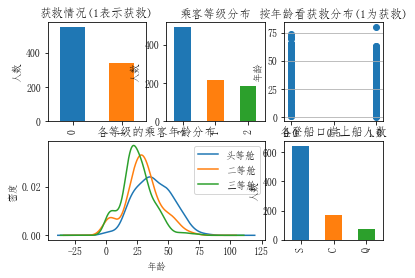

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import mpl
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['FangSong']
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
fig = plt.figure()
# 设置图表颜色alpha参数
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind="bar")
plt.title(u"获救情况(1表示获救)")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.title(u"乘客等级分布")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived,data_train.Age)
plt.ylabel(u"年龄")
plt.grid(b=True,which="major",axis="y")
plt.title(u"按年龄看获救分布(1为获救)")

plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind="kde")
data_train.Age[data_train.Pclass == 2].plot(kind="kde")
data_train.Age[data_train.Pclass == 3].plot(kind="kde")
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u"头等舱",u"二等舱",u"三等舱"),loc="best")

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind="bar")
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
plt.show()

### 属性与获救结果的关联统计
* 乘客等级的获救情况:明显等级为1的乘客，获救的概率高很多。

<Figure size 432x288 with 0 Axes>

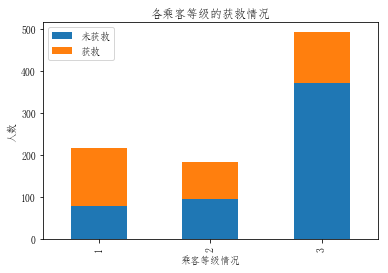

In [5]:
fig = plt.figure()
fig.set(alpha=0.2)
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
df.plot(kind="bar",stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级情况")
plt.ylabel(u"人数")
plt.show()

#### 各性别获救的情况
* lady first践行得不错,性别无疑也要作为重要特征加入最后的模型之中。

<Figure size 432x288 with 0 Axes>

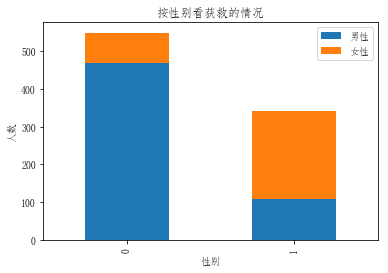

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)
Survived_m = data_train.Survived[data_train.Sex == "male"].value_counts()
Survived_f = data_train.Survived[data_train.Sex == "female"].value_counts()
df = pd.DataFrame({u"男性":Survived_m,u"女性":Survived_f})
df.plot(kind="bar",stacked=True)
plt.title(u"按性别看获救的情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.show()

#### 舱等级和性别的获救情况

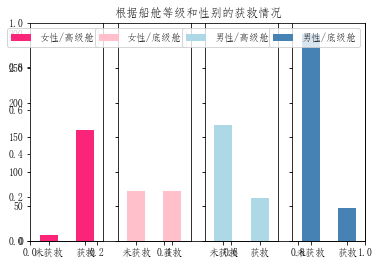

In [7]:
fig = plt.figure()
fig.set(alpha=0.5)
plt.title(u"根据船舱等级和性别的获救情况")
ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == "female"][data_train.Pclass != 3].value_counts().sort_index().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticks([0,1])
ax1.set_xticklabels([u"未获救",u"获救"],rotation = 0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2 = fig.add_subplot(142,sharey=ax1)
data_train.Survived[data_train.Sex == "female"][data_train.Pclass == 3].value_counts().sort_index().plot(kind="bar",label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救",u"获救"],rotation = 0)
ax2.legend([u"女性/底级舱"], loc='best')

ax3 = fig.add_subplot(143,sharey=ax1)
data_train.Survived[data_train.Sex == "male"][data_train.Pclass != 3].value_counts().sort_index().plot(kind="bar",label='male, high class', color='lightblue')
ax3.set_xticklabels([u"未获救",u"获救"],rotation = 0)
ax3.legend([u"男性/高级舱"], loc='best')

ax4 = fig.add_subplot(144,sharey=ax1)
data_train.Survived[data_train.Sex == "male"][data_train.Pclass == 3].value_counts().sort_index().plot(kind="bar",label='male, low class', color='steelblue')
ax4.set_xticklabels([u"未获救",u"获救"],rotation = 0)
ax4.legend([u"男性/底级舱"], loc='best')
plt.show()

#### 各登船港口的获救情况

<Figure size 432x288 with 0 Axes>

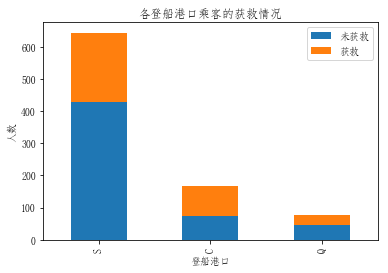

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
df.plot(kind="bar",stacked=True)
plt.title(u"各登船港口乘客的获救情况")
plt.xlabel(u"登船港口")
plt.ylabel(u"人数")
plt.show()

#### 堂兄弟/妹 孩子/父母有几人 是否对获救有影响

In [9]:
gg = data_train.groupby(["SibSp","Survived"])
df_gg = pd.DataFrame(gg.count())["PassengerId"]
print(df_gg)

gp = data_train.groupby(["Parch","Survived"])
df_gp = pd.DataFrame(gp.count())["PassengerId"]
print(df_gp)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64
Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64


### 属性tickets和cabin分析
* ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴
* cabin只有204个乘客有值，我们先看看它的一个分布

In [10]:
data_train.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
E101               3
F2                 3
F33                3
C22 C26            3
D                  3
D35                2
D26                2
E8                 2
B5                 2
C83                2
D33                2
C124               2
B28                2
B58 B60            2
E44                2
B77                2
D17                2
E67                2
B22                2
C126               2
C52                2
E24                2
C68                2
E121               2
F4                 2
F G73              2
B57 B59 B63 B66    2
                  ..
E46                1
C101               1
B69                1
C46                1
C49                1
B94                1
C90                1
C111               1
B102               1
B71                1
E12                1
D6                 1
A10                1
A19                1
A16                1
C91                1
B73          

#### 有无cabin属性对是否获救有影响
* 有Cabin记录的似乎获救概率稍高一些，先放一下

<Figure size 432x288 with 0 Axes>

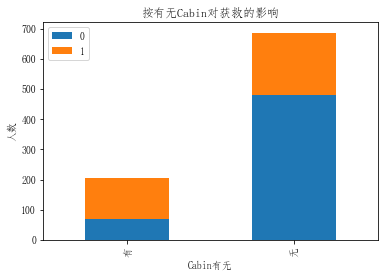

In [11]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_notcabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({u"有":Survived_cabin,u"无":Survived_notcabin}).transpose()
df.plot(kind="bar",stacked=True)
plt.title(u"按有无Cabin对获救的影响")
plt.xlabel(u"Cabin有无")
plt.ylabel(u"人数")
plt.show()

# 简单数据预处理
### 先对最突出的数据属性进行预处理:Cabin和Age

#### Cabin== 按Cabin有无数据,将这个属性处理成Yes和No两种类型
#### Age==用scikit-learn中的RandomForest来拟合一下缺失的年龄数据
* 1.如果缺值的样本占总数比例极高,我们可能就直接舍弃了,作为 特征加入的话,可能反倒带入noise,影响最后的结果了. 
* 2.如果缺值的样本适中,而该属性非连续值特征属性(比如说类目属性),那就把NaN作为一个新类别,加到类别特征中 
* 3.如果缺值的样本适中,而该属性为连续值特征属性,有时候我们会考虑给定一个step(比如这里的age,我们可以考虑每隔2/3岁为一个步长),然后把它离散化,之后把NaN作为一个type加到属性类目中.   
* 4.有些情况下,缺失的值个数并不是特别多,那我们也可以试着根据已有的值,拟合一下数据,补充上.  本例中,后两种处理方式应该都是可行的,我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)

In [12]:
 from sklearn.ensemble import RandomForestRegressor

#使用RandomForestClassifier填补缺失的年龄属性
def set_missing_ags(df):
    # 把已有的数值型特征取出来丢进RandomForestRegressor中
    age_df = df[["Age","Fare","Parch","SibSp","Pclass"]]
    
    # 将乘客分为已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    
    # y即目标年龄
    y = known_age[:,0]
    
    # x即特征属性值
    X = known_age[:,1:]
    
    # 用RandomForestRegressor进行训练
    rfr = RandomForestRegressor(random_state=0,n_estimators=200,n_jobs=-1)
    rfr.fit(X,y)
    
    # 用得到的模型进行对未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:,1:])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()),"Age"] = predictedAges
    
    return df,rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),"Cabin_type"] = "Yes"
    df.loc[(df.Cabin.isnull()),"Cabin_type"] = "No"
    return df
data_train,rfr = set_missing_ags(data_train)
data_train = set_Cabin_type(data_train)
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,No
5,6,0,3,"Moran, Mr. James",male,23.140038,0,0,330877,8.4583,NaN,Q,No
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Yes
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,No
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,No
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,No


### 对非数值型特征进行独热编码
* 使用pandas的"get_dummies"来完成这个工作

In [13]:
dummies_Cabin = pd.get_dummies(data_train["Cabin_type"],prefix="Cabin_type")
dummies_Embarked = pd.get_dummies(data_train["Embarked"],prefix="Embarked")
dummies_Sex = pd.get_dummies(data_train["Sex"],prefix="Sex")
dummies_Pclass = pd.get_dummies(data_train["Pclass"],prefix="Pclass")
df = pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
df.drop(['Ticket','Embarked'],axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Cabin_type', 'Cabin_type_No',
       'Cabin_type_Yes', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

### 用scikit-learn里面的preprocessing模块进行标准化到[-1,1]之内
* 仔细看看Age和Fare两个属性,乘客的数值幅度变化,
* 了解逻辑回归与梯度下降的话,各属性值之间scale差距太大,将对收敛速度造成几万点伤害值! 甚至不收敛！

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age_scale_param = scaler.fit(df["Age"].values.reshape(-1,1))
df["Age_scaled"] = scaler.fit_transform(df["Age"].values.reshape(-1,1),age_scale_param)
fare_scale_param = scaler.fit(df["Fare"].values.reshape(-1,1))
df["Fare_scaled"] = scaler.fit_transform(df["Fare"].values.reshape(-1,1),fare_scale_param)

# 逻辑回归建模
* 把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模

In [15]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex="Survived|Age_.*|SibSp|Parch|Fare_.*|Carbin_type_.*|Embarked_.*|Sex_.*|Pclass_.*")
train_np = train_df.values

# y即第0列:标签
y = train_np[:,0]

# X即第1列及以后:特征属性
X = train_np[:,1:]

# 使用LogisticRegression进行训练
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(X,y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=1e-06, verbose=0, warm_start=False)

### 对测试集进行和训练集相同的处理

In [16]:
data_test = pd.read_csv("test.csv")
# 查看测试集是否存在缺失值
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
# 属性Fare存在一个缺失值
data_test.loc[(data_test.Fare.isnull()),"Fare"] = 0

In [18]:
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[["Age","Fare","Parch","SibSp","Pclass"]]
null_age = tmp_df[data_test.Age.isnull()].values
# 根据特征属性X预测年龄并补上
X = null_age[:,1:]
predictedAges = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()),"Age"] = predictedAges

In [19]:
# 处理属性Cabin
data_test = set_Cabin_type(data_test)
data_test["Cabin_type"].value_counts()

No     327
Yes     91
Name: Cabin_type, dtype: int64

In [20]:
# 进行对非数值型属性进行独热编码
dummies_Cabin = pd.get_dummies(data_test["Cabin_type"],prefix="Cabin_type")
dummies_Embarked = pd.get_dummies(data_test["Embarked"],prefix="Embarked")
dummies_Sex = pd.get_dummies(data_test["Sex"],prefix="Sex")
dummies_Pclass = pd.get_dummies(data_test["Pclass"],prefix="Pclass")

df_test = pd.concat([data_test,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
df_test.drop(["Ticket","Embarked"],axis=1,inplace=True)
# 对属性Age和Fare进行标准化
df_test["Age_scaled"] = scaler.fit_transform(df_test["Age"].values.reshape(-1,1),age_scale_param)
df_test["Fare_scaled"] = scaler.fit_transform(df_test["Fare"].values.reshape(-1,1),fare_scale_param)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Cabin_type,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,No,...,0,1,0,0,0,1,0,1,0.307347,-0.496637
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,No,...,0,0,1,0,0,1,1,0,1.255877,-0.511497
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,No,...,0,1,0,0,1,0,0,1,2.394114,-0.463335
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,No,...,0,0,1,0,0,1,0,1,-0.261772,-0.481704
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,No,...,0,0,1,0,0,1,1,0,-0.641184,-0.416740


# 对测试集进行预测
<font color=red>0.76555，恩，结果还不错。毕竟，这只是我们简单分析过后出的一个baseline系统嘛</font>

In [21]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Carbin_type_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions_01.csv", index=False)

In [22]:
pd.read_csv("logistic_regression_predictions_01.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# 逻辑回归模型优化

## 模型系数关联分析
下面的系数和最后的结果是一个正相关的关系<br>
我们先看看那些权重绝对值非常大的feature，在我们的模型上：<br>

* Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
* Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
* 有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)
* Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）
* 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。
* 船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)

In [23]:
# 查看逻辑回归模型的系数
pd.DataFrame({"columns":list(train_df.columns)[1:],"coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.35093402546632024]
1,Parch,[-0.08569677380507304]
2,Embarked_C,[0.0]
3,Embarked_Q,[0.0]
4,Embarked_S,[-0.3865779005738212]
5,Pclass_1,[0.9948010001552076]
6,Pclass_2,[0.0]
7,Pclass_3,[-1.2337756536804887]
8,Sex_female,[2.007681922802043]
9,Sex_male,[-0.6379976372549031]


## 交叉验证
* 做cross validation:把train.csv分成两部分,一部分用于训练我们需要的模型,另外一部分数据上看我们预测算法的效果.

In [24]:
from sklearn.model_selection import cross_val_score,train_test_split
clf = linear_model.LogisticRegression(solver="liblinear",C=1.0,penalty="l1",tol=1e-6)
all_data = df.filter(regex="Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_type_.*|Embarked_.*|Sex_.*|Pclass_.*")
X = all_data.values[:,1:]
y = all_data.values[:,0]
print(cross_val_score(clf,X,y,cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


In [25]:
# 分割数据,按照训练数据:交叉验证数据 = 7:3
split_train,split_cv = train_test_split(df,test_size=0.3,random_state=42)
train_df = split_train.filter(regex="Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_type_.*|Embarked_.*|Sex_.*|Pclass_.*")
# 生成模型
clf = linear_model.LogisticRegression(solver="liblinear",C=1.0,penalty="l1",tol=1e-6)
clf.fit(train_df.values[:,1:],train_df.values[:,0])
# 对交叉验证数据集进行预测
cv_df = split_cv.filter(regex="Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_type_.*|Embarked_.*|Sex_.*|Pclass_.*")
predictions = clf.predict(cv_df.values[:,1:])

origin_data_train = pd.read_csv("train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",male,24.00,0,0,PC 17593,79.2000,B86,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S


对比bad case，我们仔细看看我们预测错的样本，到底是哪些特征有问题，咱们处理得还不够细？<br>

我们随便列一些可能可以做的优化操作：<br>

* Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
* Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
* Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
* 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
* 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
* 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
* 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
* Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

大家接着往下挖掘，可能还可以想到更多可以细挖的部分。我这里先列这些了，然后我们可以使用手头上的”train_df”和”cv_df”开始试验这些feature engineering的tricks是否有效了。

In [26]:
# 构建一个新的属性family_size
df["family_size"] = df["SibSp"] + df["Parch"] + 1
df.family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [27]:
df.loc[df.family_size == 1,"family_type"] = "single"
df.loc[df.family_size.isin([2,3]),"family_type"] = "middle"
df.loc[df.family_size >= 4,"family_type"] = "big"
df.family_type.value_counts()

single    537
middle    263
big        91
Name: family_type, dtype: int64

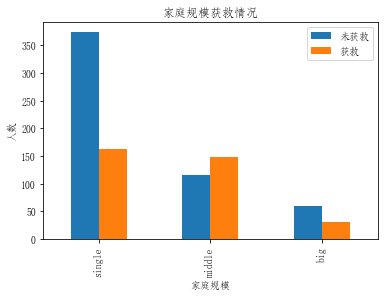

In [28]:
Survived_0 = df.family_type[df.Survived == 0].value_counts()
Survived_1 = df.family_type[df.Survived == 1].value_counts()
family_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1}) 
family_df.plot(kind="bar")
plt.title(u"家庭规模获救情况")
plt.xlabel(u"家庭规模")
plt.ylabel(u"人数")
plt.show()

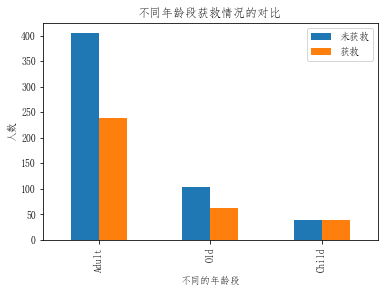

In [29]:
# 对age进行离散化
df.loc[df.Age < 12,"Age_type"] = "Child"
df.loc[df.Age.between(13,40),"Age_type"] = "Adult"
df.loc[df.Age > 40,"Age_type"] = "Old"
Survived_0 = df.Age_type[df.Survived == 0].value_counts()
Survived_1 = df.Age_type[df.Survived == 1].value_counts()
age_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
age_df.plot(kind="bar")
plt.title(u"不同年龄段获救情况的对比")
plt.xlabel(u"不同的年龄段")
plt.ylabel(u"人数")
plt.show()

In [30]:
# 进行Name属性的处理
import re
regex = re.compile("(.*, )|(\\..*)")
title = []
for name in df.Name.values:
    title.append(re.sub(regex,'',name))
df["title"] = title
df.loc[df.title == "Mlle","title"] = "Miss"
df.loc[df.title == "Ms","title"] = "Miss"
df.loc[df.title == "Mme","title"] = "Mrs"
common = ["Mr","Miss","Mrs","Master"]
df.loc[~df.title.isin(common),"title"] = "rare"
df.title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
rare       23
Name: title, dtype: int64

In [31]:
# 对Cabin进行处理
train_cabin_type = []
for tmp_cabin in df.Cabin.values:
    train_cabin_type.append(str(tmp_cabin)[0])
df["Cabin_first"] = train_cabin_type
df.loc[df.Cabin_first == "G","Cabin_first"] = "O"
df.loc[df.Cabin_first == "T","Cabin_first"] = "O"
df.Cabin_first.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
O      5
Name: Cabin_first, dtype: int64

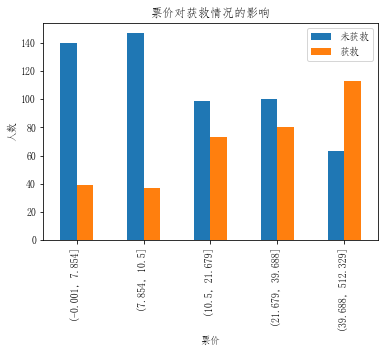

In [32]:
# 对Fare进行离散化
df['Fare_bin'] = pd.qcut(df['Fare'], 5)
Survived_0 = df.Fare_bin[df.Survived == 0].value_counts()
Survived_1 = df.Fare_bin[df.Survived == 1].value_counts()
fare_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
fare_df.plot(kind="bar")
plt.title("票价对获救情况的影响")
plt.xlabel("票价")
plt.ylabel("人数")
plt.show()

In [33]:
# 对Fare进行独热编码
dummies_fare_bin = pd.get_dummies(df['Fare_bin']).rename(columns=lambda x: 'Fare_bin_' + str(x))
df = pd.concat([df, dummies_fare_bin], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,family_type,Age_type,title,Cabin_first,Fare_bin,"Fare_bin_(-0.001, 7.854]","Fare_bin_(7.854, 10.5]","Fare_bin_(10.5, 21.679]","Fare_bin_(21.679, 39.688]","Fare_bin_(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,...,middle,Adult,Mr,n,"(-0.001, 7.854]",1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,...,middle,Adult,Mrs,C,"(39.688, 512.329]",0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,...,single,Adult,Miss,n,"(7.854, 10.5]",0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,...,middle,Adult,Mrs,C,"(39.688, 512.329]",0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,...,single,Adult,Mr,n,"(7.854, 10.5]",0,1,0,0,0


In [34]:
# 对family_type进行独热编码
# 对title进行独热编码
# 对age_type进行独热编码
# 对cabin_first进行独热编码
dummies_title = pd.get_dummies(df["title"],prefix="title")
dummies_family = pd.get_dummies(df["family_type"],prefix="family_type")
dummies_age = pd.get_dummies(df["Age_type"],prefix="Age_type")
dummies_cabin_first = pd.get_dummies(df["Cabin_first"],prefix="Cabin_first")
train_df_opt1 = pd.concat([df,dummies_title,dummies_family,dummies_age,dummies_cabin_first],axis=1)
train_df_opt1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Cabin_type', 'Cabin_type_No',
       'Cabin_type_Yes', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age_scaled',
       'Fare_scaled', 'family_size', 'family_type', 'Age_type', 'title',
       'Cabin_first', 'Fare_bin', 'Fare_bin_(-0.001, 7.854]',
       'Fare_bin_(7.854, 10.5]', 'Fare_bin_(10.5, 21.679]',
       'Fare_bin_(21.679, 39.688]', 'Fare_bin_(39.688, 512.329]',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_rare',
       'family_type_big', 'family_type_middle', 'family_type_single',
       'Age_type_Adult', 'Age_type_Child', 'Age_type_Old', 'Cabin_first_A',
       'Cabin_first_B', 'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E',
       'Cabin_first_F', 'Cabin_first_O', 'Cabin_first_n'],
      dtype='object')

In [35]:
train_df = train_df_opt1.filter(regex="Survived|SibSp|Parch|Pclass_.*|Sex_.*|title_.*|family_type_.*|Age_type_.*|Fare_s.*")
train_df.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Fare_scaled,title_Master,title_Miss,title_Mr,title_Mrs,title_rare,family_type_big,family_type_middle,family_type_single,Age_type_Adult,Age_type_Child,Age_type_Old
0,0,1,0,0,0,1,0,1,-0.502445,0,0,1,0,0,0,1,0,1,0,0
1,1,1,0,1,0,0,1,0,0.786845,0,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,-0.488854,0,1,0,0,0,0,0,1,1,0,0
3,1,1,0,1,0,0,1,0,0.420730,0,0,0,1,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,1,-0.486337,0,0,1,0,0,0,0,1,1,0,0


In [36]:
# 模型融合
from sklearn.ensemble import BaggingRegressor

train_np = train_df.values
# y即Survival结果
y = train_np[:, 0]
# X即特征属性值
X = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

BaggingRegressor(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=20, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [37]:
# 构建逻辑回归模型
# clf_opt1 = linear_model.LogisticRegression(solver="liblinear",C=1.0,penalty="l1",tol=1e-6)
# clf_opt1.fit(train_df.values[:,1:],train_df.values[:,0])

In [38]:
# # 构建支持向量机模型
# from sklearn.svm import LinearSVC,SVC
# # svm_clf_opt1 = LinearSVC(C=1,loss="hinge")
# # svm_clf_opt1.fit(train_df.values[:,1:],train_df.values[:,0])
# svm_clf_opt2 = SVC(kernel="rbf")
# svm_clf_opt2.fit(train_df.values[:,1:],train_df.values[:,0])

In [39]:
#对测试集进行与训练集相同的处理
# 对Name属性进行提取称呼,如在测试集处理时
import re
regex = re.compile("(.*, )|(\\..*)")
title = []
for name in df_test.Name.values:
    title.append(re.sub(regex,'',name))
df_test["title"] = title
df_test.title.value_counts()
df_test.loc[df_test.title == "Mlle","title"] = "Miss"
df_test.loc[df_test.title == "Ms","title"] = "Miss"
df_test.loc[df_test.title == "Mme","title"] = "Mrs"
common = ["Mr","Miss","Mrs","Master"]
df_test.loc[~df_test.title.isin(common),"title"] = "rare"

In [40]:
# 对SibSp和Parch进行合并为family_size新的属性
df_test["family_size"] = df_test["SibSp"] + df_test["Parch"] + 1
df_test.loc[df_test.family_size == 1,"family_type"] = "single"
df_test.loc[df_test.family_size.isin([2,3]),"family_type"] = "middle"
df_test.loc[df_test.family_size >= 4,"family_type"] = "big"
df_test.family_type.value_counts()

single    253
middle    131
big        34
Name: family_type, dtype: int64

In [41]:
# 对Cabin提取首字母
test_cabin_type = []
for tmp_cabin in df_test.Cabin.values:
    test_cabin_type.append(str(tmp_cabin)[0])
df_test["Cabin_first"] = test_cabin_type
df_test.loc[df_test.Cabin_first == "G","Cabin_first"] = "O"
df_test.loc[df_test.Cabin_first == "T","Cabin_first"] = "O"
df_test.Cabin_first.value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
O      1
Name: Cabin_first, dtype: int64

In [42]:
# 对Fare进行离散化
df_test['Fare_bin'] = pd.qcut(df_test['Fare'], 5)
dummies_fare_bin = pd.get_dummies(df_test['Fare_bin']).rename(columns=lambda x: 'Fare_bin_' + str(x))
df_test = pd.concat([df_test, dummies_fare_bin], axis=1)

In [43]:
# 对Age进行离散化
df_test.loc[df_test.Age < 12,"Age_type"] = "Child"
df_test.loc[df_test.Age.between(13,40),"Age_type"] = "Adult"
df_test.loc[df_test.Age > 40,"Age_type"] = "Old"

In [44]:
#对title、family_type、Age_type以及Cabin进行独热编码
dummies_title = pd.get_dummies(df_test["title"],prefix="title")
dummies_family_type = pd.get_dummies(df_test["family_type"],prefix="family_type")
dummies_age = pd.get_dummies(df_test["Age_type"],prefix="Age_type")
dummies_cabin_first = pd.get_dummies(df_test["Cabin_first"],prefix="Cabin_first")
test_df_opt1 = pd.concat([df_test,dummies_title,dummies_family_type,dummies_age,dummies_cabin_first],axis=1)
test_df_opt1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Cabin_type', 'Cabin_type_No', 'Cabin_type_Yes', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Age_scaled', 'Fare_scaled', 'title',
       'family_size', 'family_type', 'Cabin_first', 'Fare_bin',
       'Fare_bin_(-0.001, 7.796]', 'Fare_bin_(7.796, 10.667]',
       'Fare_bin_(10.667, 21.196]', 'Fare_bin_(21.196, 46.34]',
       'Fare_bin_(46.34, 512.329]', 'Age_type', 'title_Master', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_rare', 'family_type_big',
       'family_type_middle', 'family_type_single', 'Age_type_Adult',
       'Age_type_Child', 'Age_type_Old', 'Cabin_first_A', 'Cabin_first_B',
       'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E', 'Cabin_first_F',
       'Cabin_first_O', 'Cabin_first_n'],
      dtype='object')

In [45]:
test_df = test_df_opt1.filter(regex="SibSp|Parch|Pclass_.*|Sex_.*|title_.*|family_type_.*|Age_type_.*|Fare_s.*")
test_df.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Fare_scaled,title_Master,title_Miss,title_Mr,title_Mrs,title_rare,family_type_big,family_type_middle,family_type_single,Age_type_Adult,Age_type_Child,Age_type_Old
0,0,0,0,0,1,0,1,-0.496637,0,0,1,0,0,0,0,1,1,0,0
1,1,0,0,0,1,1,0,-0.511497,0,0,0,1,0,0,1,0,0,0,1
2,0,0,0,1,0,0,1,-0.463335,0,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,-0.481704,0,0,1,0,0,0,0,1,1,0,0
4,1,1,0,0,1,1,0,-0.416740,0,0,0,1,0,0,1,0,1,0,0


In [46]:
predictions = bagging_clf.predict(test_df)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions_10_bagging.csv", index=False)

In [56]:
# predictions = clf_opt1.predict(test_df)
# result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
# result.to_csv("logistic_regression_predictions_09_age_family_title_fare_cabin.csv", index=False)

In [49]:
# predictions = svm_clf_opt2.predict(test_df)
# result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
# result.to_csv("logistic_regression_predictions_07_age_family_title_rbfsvm.csv", index=False)